# **TIME SERIES ANALYSIS**

In [1]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [3]:
df = pd.read_csv('shampo sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


<AxesSubplot:xlabel='Month', ylabel='Sales'>

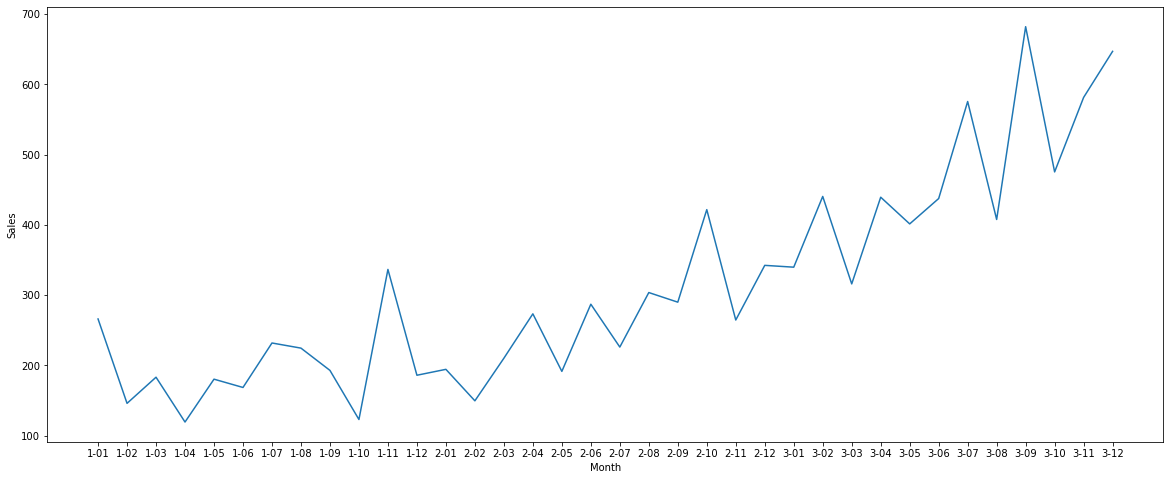

In [4]:
# Dataset awal belum stasioner

plt.figure(figsize=(20,8))

sns.lineplot(data=df, x='Month', y='Sales')

### ACF-PACF

Untuk menentukan nilai p, d, q

In [5]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf

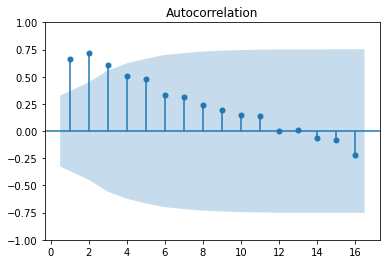

In [6]:
plot_acf(df['Sales'], zero=False)
plt.show()

Grafik ACF Slowly Decaying: data masih stasioner. Tidak bisa digunakan dalam modeling

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



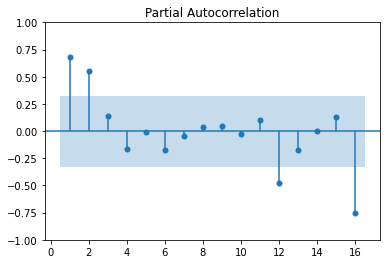

In [7]:
plot_pacf(df['Sales'], zero=False)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



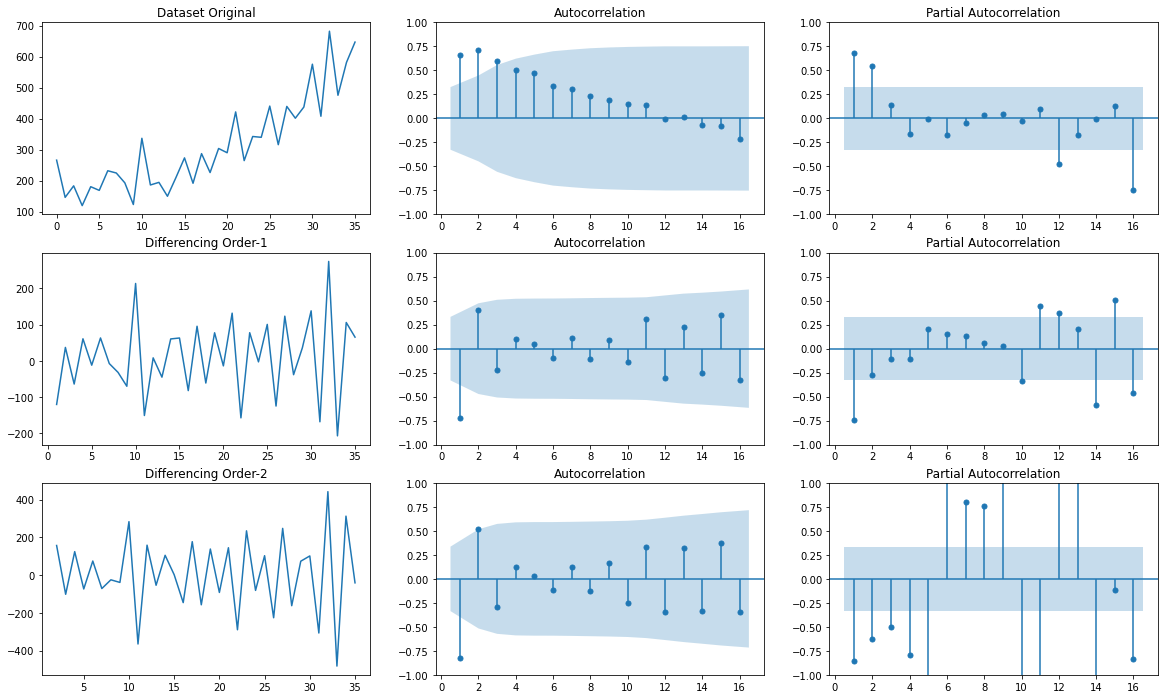

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(20,12))

# Dataset original
axes[0,0].plot(df['Sales'])
axes[0,0].set_title('Dataset Original')
plot_acf(df['Sales'], zero=False, ax=axes[0,1])
plot_pacf(df['Sales'], zero=False, ax=axes[0,2])

# Differecing order-1
axes[1,0].plot(df['Sales'].diff().dropna())
axes[1,0].set_title('Differencing Order-1')
plot_acf(df['Sales'].diff().dropna(), zero=False, ax=axes[1,1])
plot_pacf(df['Sales'].diff().dropna(), zero=False, ax=axes[1,2])

# Differecing order-2
axes[2,0].plot(df['Sales'].diff().diff().dropna())
axes[2,0].set_title('Differencing Order-2')
plot_acf(df['Sales'].diff().diff().dropna(), zero=False, ax=axes[2,1])
plot_pacf(df['Sales'].diff().diff().dropna(), zero=False, ax=axes[2,2])

plt.show()

Memilih kombinasi p,d,q:
- AR: 1 (Grafik PACF cutoff)
- I:  1 (Differencing orde 1)
- MA: 0 (Grafik ACF tailsoff)

Jadi kita akan menggunakan model ARIMA(1,1,0)

### Modeling ARIMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
model = ARIMA(df['Sales'], order=(1,1,0))
model_fit = model.fit()

In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Thu, 14 Apr 2022   AIC                            406.575
Time:                        14:43:35   BIC                            409.686
Sample:                             0   HQIC                           407.649
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4515   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

### Forcasting

In [12]:
# berapa bulan ke depan
forecast_length = 6

forecast_result = model_fit.forecast(forecast_length)
forecast_result

36    600.046377
37    633.510736
38    609.609418
39    626.680506
40    614.487788
41    623.196218
Name: predicted_mean, dtype: float64

In [13]:
# Membuat nama bulan

list_month = []

for i in range(forecast_length):
    list_month.append('4-'+str(i+1))

list_month

['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']

In [14]:
# Hasil forecast dalam DataFrame 

df_sales_f = pd.DataFrame({
    'Month':list_month,
    'Sales':forecast_result
})

df_sales_f

,Month,Sales
36,4-1,600.046377
37,4-2,633.510736
38,4-3,609.609418
39,4-4,626.680506
40,4-5,614.487788
41,4-6,623.196218


In [15]:
df_sales_f.loc[36, :]

Month           4-1
Sales    600.046377
Name: 36, dtype: object

In [16]:
df = df.append(df_sales_f.loc[36, :])

In [17]:
# df.append(df_sales_f)

In [29]:
import plotly.graph_objects as go

In [28]:
fig = go.Figure([go.Scatter(x=df['Month'], y=df['Sales'], name='Original')])

fig.add_trace(go.Scatter(x=df_sales_f['Month'], y=df_sales_f['Sales'], name='Forecast'))
fig.update_xaxes(rangeslider_visible=True)

### **Cek stationarity dengan menggunakan adfuller test**


In [20]:
from statsmodels.tsa.stattools import adfuller

**Hypothesis untuk adfuller test:**

$H_0$: Data tidak stasioner

$H_1$: Data stasioner

In [21]:
adfuller(df['Sales'].diff().dropna())

(-7.6510313324320895,
 1.7891438233740347e-11,
 1,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 285.7555286210812)

In [22]:
# adfuller test
data = df['Sales'].diff().dropna()

adf_result = adfuller(data)[1]

if adf_result > 0.05:
    print('p-value: ', adf_result, 'Failed to reject Ho. We assume the data is not stationary')
else:
    print('p-value: ',adf_result, 'Reject Ho.  We assume the data is stationary')

p-value:  1.7891438233740347e-11 Reject Ho.  We assume the data is stationary


### Mencari p,d,q Terbaik dengan pmdarima

In [23]:
%pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pmdarima as pmd

In [25]:
pmd.auto_arima(
    df['Sales'],
    start_p=1,
    start_q=1,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=412.705, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=442.342, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=416.438, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=419.452, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=440.613, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=414.560, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=414.021, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=417.327, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.612 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [26]:
# pmd.auto_arima(
#     df['Sales'].diff().dropna(),
#     start_p=1,
#     start_q=1,
#     trace=True
# )

In [27]:
# ?pmd.auto_arima